## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [9]:
# length of all columns is 249, no missing data
mouse_metadata.count()

# Preview dataframe
# mouse_metadata.head()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [10]:
# length of all columns is 1893, no missing data
study_results.count()

# Preview dataframe
# study_results.head()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [14]:
# Combine the data into a single dataset
resultsMerged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# # Check length of columns are all 1893
# resultsMerged_df.count()

# Display the data table for preview
resultsMerged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [19]:
# Check the number of unique mice
resultsMerged_df.nunique()

# # names of drug regimens
# resultsMerged_df["Drug Regimen"].unique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = resultsMerged_df[resultsMerged_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicateMice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 

dataForMouse_g989 = resultsMerged_df.loc[resultsMerged_df['Mouse ID'] == "g989"]
dataForMouse_g989

# # Check # of row of mouse g989 data
# print(len(dataForMouse_g989))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = resultsMerged_df[resultsMerged_df["Mouse ID"].isin(dataForMouse_g989) == False]
# clean_df

# Find the index positions of mouse g989 data
indexNames = resultsMerged_df[resultsMerged_df["Mouse ID"] == "g989"].index

# Pass the list of indexes to the drop of the merged data
clean_df = resultsMerged_df.drop(indexNames, inplace=False)
clean_df

# # clean_df has no mouse g989 data, check dataframe length
# clean_df.count()

Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

In [27]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

# # Can also check with length of unique
# len(clean_df["Mouse ID"].unique())


248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugGroup = clean_df.groupby("Drug Regimen")

meandrugGroup = drugGroup.mean()["Tumor Volume (mm3)"]
meandrugGroup

mediandrugGroup = drugGroup.median()["Tumor Volume (mm3)"]
mediandrugGroup

variancedrugGroup = drugGroup.var()["Tumor Volume (mm3)"]
variancedrugGroup

stddrugGroup = drugGroup.std()["Tumor Volume (mm3)"]
stddrugGroup

semdrugGroup = drugGroup.sem()["Tumor Volume (mm3)"]
semdrugGroup

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Display in dataframe
sumStats_DrugGroups_df = pd.DataFrame({
    "Mean Tumor Volume": meandrugGroup, 
    "Median Tumor Volume": mediandrugGroup, 
    "Variance Tumor Volume": variancedrugGroup,
    "Standard Deviation Tumor Volume": stddrugGroup, 
    "Standard Error of Mean Tumor Volume": semdrugGroup

})

sumStats_DrugGroups_df

# Need to come back and format floats?

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error of Mean Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summStatsAgg = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summStatsAgg

# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

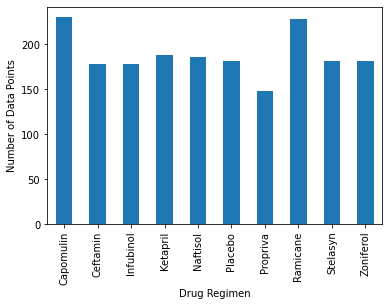

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

numberMice = drugGroup.count()["Mouse ID"]
# numberMice

numberMice_barPandas = numberMice.plot(kind="bar")
numberMice_barPandas.set_ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

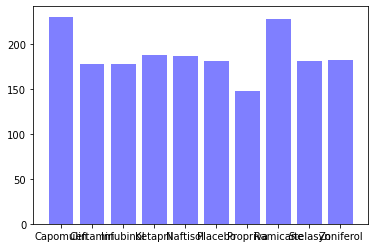

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# x-axis is drug regimens
# pull list of index or keys from drug groupby object?

x_axis_drugs = numberMice.index
x_axis_drugs

                         
# y_values is numberMice

plt.bar(x_axis_drugs, numberMice, color='b', alpha=0.5, align='center')

Text(0, 0.5, 'Sex')

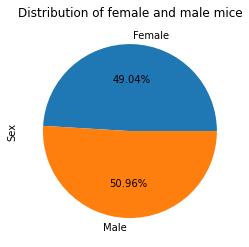

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group mice by gender
genderGroup = clean_df.groupby("Sex")

genderMice = genderGroup.count()["Mouse ID"]
genderMice

gender_keys = genderMice.index
gender_keys

pie = genderMice.plot(kind="pie", y=gender_keys, autopct="%1.2f%%", title="Distribution of female and male mice")
pie

pie.set_ylabel("Sex")

# plt.show()
# plt.tight_layout()
# plt.axis("equal")

Text(0, 0.5, 'Sex')

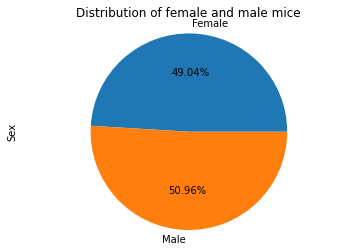

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# list_gender
# list
plt.pie(genderMice, labels=gender_keys, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Distribution of female and male mice")
plt.ylabel("Sex")

# plt.savefig("../pie_pylot.png")
# plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
